Enter a candidate name (Donald Trump or Kamala Harris):  donald trump


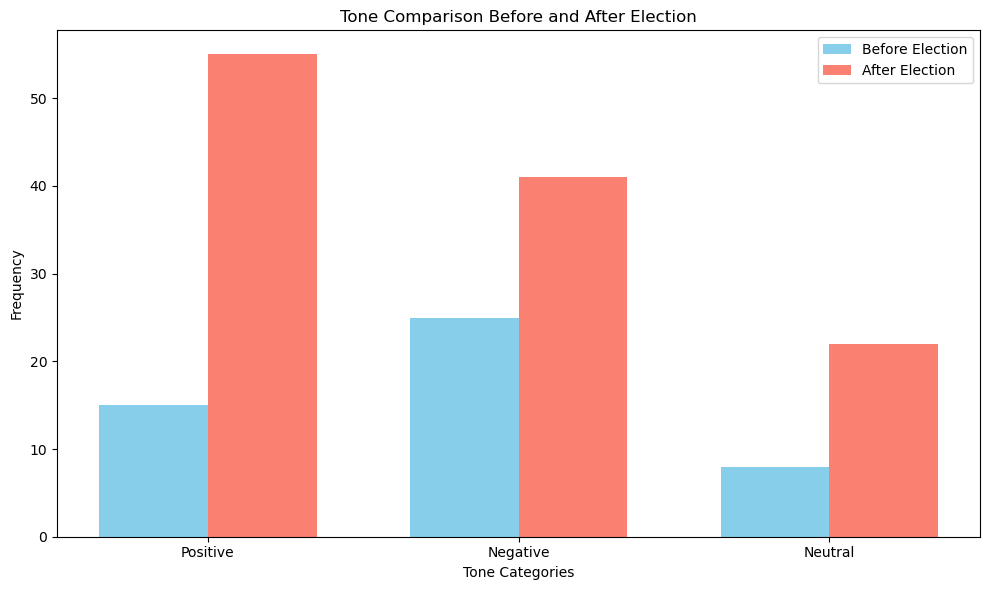

In [7]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt

def load_sentiment_words(positive_file, negative_file):
    positive_words = pd.read_csv(positive_file, header=None).squeeze().str.strip().tolist()
    negative_words = pd.read_csv(negative_file, header=None).squeeze().str.strip().tolist()
    return positive_words, negative_words

def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

def analyze_tone(tweet, positive_words, negative_words):
    words = clean_text(tweet).split()
    positive_count = sum(word in positive_words for word in words)
    negative_count = sum(word in negative_words for word in words)
    total_words = len(words)
    
    if total_words == 0:
        return "Neutral"
    
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

def get_word_frequency(tweets, positive_words, negative_words):
    all_words = []
    for tweet in tweets:
        words = clean_text(tweet).split()
        filtered_words = [word for word in words if word in positive_words or word in negative_words]
        all_words.extend(filtered_words)
    return Counter(all_words)

def analyze_tweets(file_path, positive_words, negative_words):
    df = pd.read_csv(file_path)
    tweets = df['tweet']
    tones = tweets.apply(lambda tweet: analyze_tone(tweet, positive_words, negative_words))
    word_frequency = get_word_frequency(tweets, positive_words, negative_words)
    
    tone_summary = tones.value_counts()
    return tone_summary, word_frequency

def compare_tweets(before_file, after_file, positive_words, negative_words):
    before_tone, before_word_freq = analyze_tweets(before_file, positive_words, negative_words)
    after_tone, after_word_freq = analyze_tweets(after_file, positive_words, negative_words)
    
    tone_categories = ["Positive", "Negative", "Neutral"]
    before_counts = [before_tone.get(tone, 0) for tone in tone_categories]
    after_counts = [after_tone.get(tone, 0) for tone in tone_categories]

    bar_width = 0.35
    index = range(len(tone_categories))

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(index, before_counts, bar_width, label='Before Election', color='skyblue')
    ax.bar([i + bar_width for i in index], after_counts, bar_width, label='After Election', color='salmon')
    
    ax.set_xlabel('Tone Categories')
    ax.set_ylabel('Frequency')
    ax.set_title('Tone Comparison Before and After Election')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(tone_categories)
    ax.legend()

    plt.tight_layout()
    plt.show()


def main():
    positive_file = "positive_words_list.csv"
    negative_file = "negative_words_list.csv"
    
    positive_words, negative_words = load_sentiment_words(positive_file, negative_file)
    
    candidate = input("Enter a candidate name (Donald Trump or Kamala Harris): ")
    if candidate.lower() == "donald trump":
        before_file = "trump_campaign_data.csv"
        after_file = "trump_non_campaign_data.csv"
    elif candidate.lower() == "kamala harris":
        before_file = "harris_before.csv"
        after_file = "harris_after.csv"
    else:
        print("Invalid candidate name. Please enter 'Donald Trump' or 'Kamala Harris'.")
        return
    
    compare_tweets(before_file, after_file, positive_words, negative_words)

if __name__ == "__main__":
    main()
